In [1]:
from apiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow

In [2]:
scopes = ['https://www.googleapis.com/auth/calendar']
flow = InstalledAppFlow.from_client_secrets_file("client_secret.json", scopes=scopes)

In [3]:
credentials = flow.run_local_server()
service = build("calendar", "v3", credentials=credentials)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=566185398584-13kj9ck255h4i1phftrq6hjkpgh394e4.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcalendar&state=QhrLcTitCjgoJS0k31OeusSLazC93K&access_type=offline


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [63]:
name = input('Name of event')
time_str = input("enter time in this format H:M:S ")
start_time =  datetime.strptime(time_str, '%H:%M:%S')
time_str = input("enter time in this format H:M:S ")
end_time = datetime.strptime(time_str, '%H:%M:%S')
timezone = 'Asia/Saigon'
prio = input('Priority')
tag = input('tag')
data ={
    'Name_of_Event' : ,
    'Start' : ,
    'End' : ,
    'priority' : , 
    'tag' : ,
    'Complete' : ,
    'Plantype' : 
}
#completed,incomplete
#unplanned,manually,autoplaned

Name of eventTest
enter time in this format H:M:S 20:20:20
enter time in this format H:M:S 22:20:20
Priority4
tagStudy


In [64]:
data['Name_of_Event'].append(name)
data['Start'].append(start_time)
data['End'].append(end)
data['priority'].append(prio)
data['tag'].append(tag)


In [8]:
tdf

,priority,tag,label,label_encoded,tag_encoded
0,1,study,morning,2,2
1,2,study,evening,1,2
2,1,study,evening,1,2
3,1,play,afternoon,0,1
4,2,study,evening,1,2
...,...,...,...,...,...
58,3,play,evening,1,1
59,2,other,afternoon,0,0
60,3,play,afternoon,0,1
61,1,play,evening,1,1


In [2]:
import matplotlib.pyplot as plt

In [156]:
tdf = tdf.append({'priority' : 2, 'tag' : 'study', 'label' : 'evening' },
        ignore_index = True)
tdf = tdf.append({'priority' : 3, 'tag' : 'study', 'label' : 'afternoon'},
        ignore_index = True)
tdf = tdf.append({'priority' : 3, 'tag' : 'IELTS', 'label' : 'morning' },
        ignore_index = True)
tdf = tdf.append({'priority' : 3, 'tag' : 'study', 'label' : 'afternoon' },
        ignore_index = True)
tdf = tdf.append({'priority' : 2, 'tag' : 'IELTS', 'label' : 'morning' },
        ignore_index = True)
tdf = tdf.append({'priority' : 3, 'tag' : 'study', 'label' : 'morning' },
        ignore_index = True)
tdf = tdf.append({'priority' : 3, 'tag' : 'Play', 'label' : 'evening' },
        ignore_index = True)
tdf = tdf.append({'priority' : 3, 'tag' : 'Play', 'label' : 'evening' },
        ignore_index = True)
tdf = tdf.append({'priority' : 3, 'tag' : 'Play', 'label' : 'evening' },
        ignore_index = True)

In [3]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='priority', ylabel='tag_encoded'>

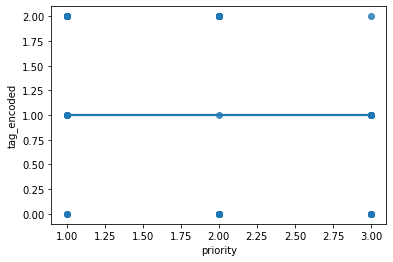

In [38]:
x = tdf['priority']
y = tdf['tag_encoded']
sns.regplot(x=x, y=y, data=tdf, logistic=True, ci=None)

In [27]:
tdf = pd.DataFrame(columns = ['priority', 'task_type', 'label'])
tdf = pd.read_csv('test.csv')  

In [28]:
tdf.label = tdf.label.astype('category')
tdf['label_encoded'] = tdf.label.cat.codes
tdf.task_type = tdf.task_type.astype('category')
tdf['task_type_encoded'] = tdf.task_type.cat.codes

In [25]:
tdf

,priority,task_type,label,label_encoded,task_type_encoded
0,1,study,morning,2,2
1,2,study,evening,1,2
2,1,study,evening,1,2
3,1,play,afternoon,0,1
4,2,study,evening,1,2
...,...,...,...,...,...
66,2,play,evening,1,1
67,2,study,evening,1,2
68,1,study,evening,1,2
69,3,study,evening,1,2


<AxesSubplot:xlabel='priority', ylabel='tag_encoded'>

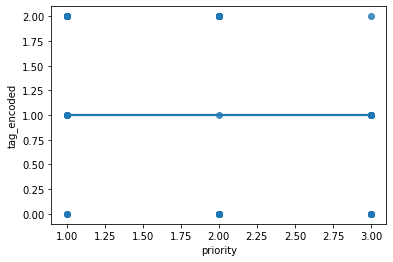

In [35]:
x = tdf['priority']
y = tdf['tag_encoded']
sns.regplot(x=x, y=y, data=tdf, logistic=True, ci=None)

In [6]:
from sklearn.model_selection import train_test_split

In [29]:
tdf.drop(['label','task_type'], axis=1)

,priority,label_encoded,task_type_encoded
0,1,2,2
1,2,1,2
2,1,1,2
3,1,0,1
4,2,1,2
...,...,...,...
66,2,1,1
67,2,1,2
68,1,1,2
69,3,1,2


In [20]:
x_train, x_test, y_train, y_test = train_test_split(tdf[['priority','tag_encoded']],tdf.label_encoded, test_size=0.3, random_state=0)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logmodel = LogisticRegression()

In [23]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [24]:
logmodel.predict(x_train)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int8)

In [25]:
logmodel.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int8)

In [26]:
logmodel.score(x_train,y_train)

0.7045454545454546

In [27]:
dict(enumerate(tdf.label.cat.categories))

{0: 'afternoon', 1: 'evening', 2: 'morning'}

In [28]:
dict(enumerate(tdf.tag.cat.categories))

{0: 'other', 1: 'play', 2: 'study'}

In [29]:
logmodel.predict(np.array([[1,0]]))
#uu tien va other thi lam vao buoi sang

array([2], dtype=int8)

In [30]:
logmodel.predict(np.array([[1,2]]))
#uu tien va study thi lam vao buoi toi

array([1], dtype=int8)

In [31]:
import seaborn as sns

<AxesSubplot:xlabel='priority', ylabel='tag_encoded'>

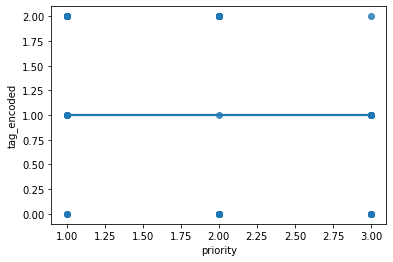

In [34]:
plt.show()